<a href="https://colab.research.google.com/github/zeineb-ouerghi/Capstone-Project-/blob/main/Analysis_%26_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import requests 
import json
import matplotlib.pyplot as plt
import plotly
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')
## data acquisition 
## Spaced repetition DATA from Duolingo Research 
dataframe = pd.read_csv("/content/drive/MyDrive/Capstone Project/duolingodata.csv.gz")
#Data Cleaning and Manipulation 
#data.head()
#adding variables 
#adding number of mistakes made 
dataframe['mistakes'] = dataframe.history_seen - dataframe.history_correct
dataframe['session_mistakes'] = dataframe.session_seen - dataframe.session_correct
dataframe['rate_of_error_per_session'] = dataframe.session_mistakes/dataframe.session_seen
dataframe['general_rate_of_error'] = dataframe.mistakes/dataframe.history_seen 
# unit='s' to convert it into epoch time
dataframe['Datetime'] = pd.to_datetime(dataframe['timestamp'], 
                                  unit='s')

Mounted at /content/drive


In [12]:
dataframe.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,mistakes,session_mistakes,rate_of_error_per_session,general_rate_of_error,Datetime
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2,2,0,0.0,0.333333,2013-02-28 18:28:01
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1,0,1,0.5,0.000000,2013-02-28 18:28:01
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1,1,0,0.0,0.200000,2013-02-28 18:28:01
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1,1,1,0.5,0.166667,2013-02-28 18:28:01
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1,0,0,0.0,0.000000,2013-02-28 18:28:01


In [ ]:
t = dataframe.groupby(['learning_language'])['p_recall'].sum().reset_index()
fig = px.bar(t, x="p_recall", y="learning_language", color="p_recall", orientation='h', height=400,hover_data=['p_recall'])
fig.update_layout(
    xaxis_title="p_recall",
    yaxis_title="Learning_Language",
    title="P_recall vs Learning Language",
)
fig.show()
fig.write_html("Sumprecall.html")

In [ ]:
t = dataframe.groupby(['learning_language'])['p_recall'].mean().reset_index()
fig = px.bar(t, x="p_recall", y="learning_language", color="p_recall", orientation='h', height=400,hover_data=['p_recall'])
fig.update_layout(
    xaxis_title="Mean p_recall",
    yaxis_title="Learning Language",
    title="Mean P_recall vs Learning_language",
)
fig.show()
fig.write_html("MeanPrecall.html")

In [ ]:
t = dataframe.groupby(['learning_language'])['p_recall'].std().reset_index()
fig = px.bar(t, x="p_recall", y="learning_language", color="p_recall", orientation='h', height=400,hover_data=['p_recall'])
fig.update_layout(
    xaxis_title="Mean p_recall",
    yaxis_title="Learning Language",
    title="Mean P_recall vs Learning_language",
)
fig.show()
fig.write_html("MeanPrecall.html")

In [ ]:
fig = px.scatter(dataframe, x="p_recall", y="general_rate_of_error", trendline="ols", title="Goals scored vs City Altitude", color_discrete_sequence=px.colors.qualitative.Dark24, opacity=0.8, size_max=10, height=600, width=800, template='plotly_dark', trendline_color_override='red')
fig.show()

In [ ]:
dataframe['p_recall'].corr(dataframe['general_rate_of_error'])

-0.1059646981837381

In [ ]:
fig.show()

In [ ]:
dataframe.groupby(['user_id'])['mistakes'].mean().round().sort_values(ascending = False).reset_index()

,user_id,mistakes
0,u:bcH_,361.0
1,u:NPs,164.0
2,u:oMO,141.0
3,u:IY_,128.0
4,u:goA,94.0
...,...,...
115217,u:iQsn,0.0
115218,u:iQso,0.0
115219,u:i6wT,0.0
115220,u:fCUL,0.0


In [4]:
sample = dataframe

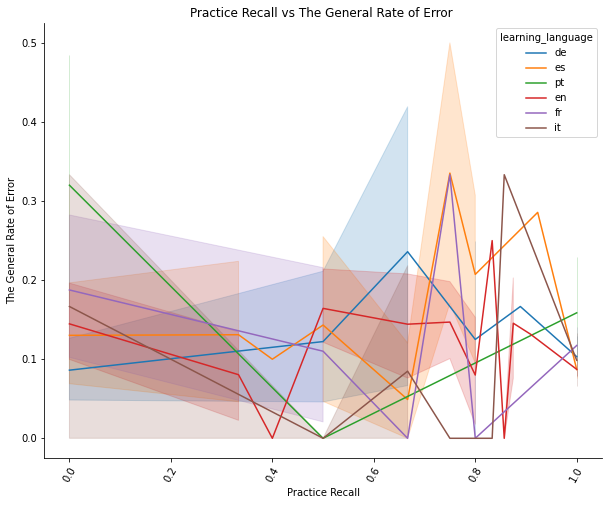

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure (figsize = (10,8))
sns.lineplot(x='p_recall', y = 'general_rate_of_error', hue = 'learning_language',  data = dataframe[:2000])
plt.ylabel('The General Rate of Error')
plt.xlabel ('Practice Recall')
plt.title('Practice Recall vs The General Rate of Error ')
plt.xticks (rotation = 60)
sns.despine()

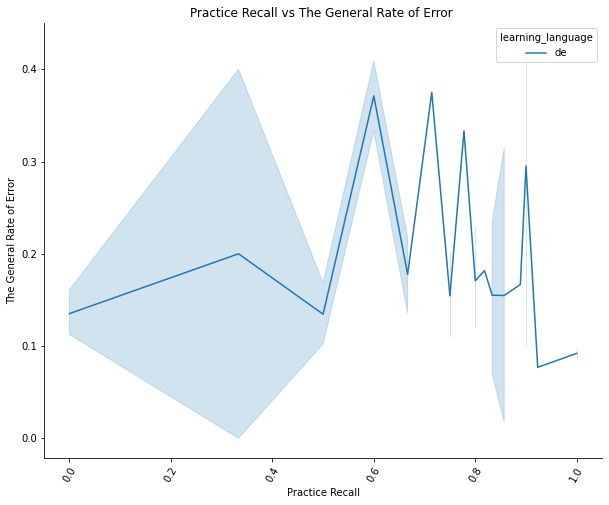

In [6]:
sample = dataframe.loc[dataframe['learning_language'] == "de"]
plt.figure (figsize = (10,8))
sns.lineplot(x='p_recall', y = 'general_rate_of_error', hue = 'learning_language',  data = sample[:3000])
plt.ylabel('The General Rate of Error')
plt.xlabel ('Practice Recall')
plt.title('Practice Recall vs The General Rate of Error ')
plt.xticks (rotation = 60)
sns.despine()

In [10]:
# we are now getting the users and the leatnrin language
sap = dataframe.groupby(['user_id','learning_language']).agg({'lexeme_id':'count','p_recall':'count'})
# sorting users by id
sorted = sap.sort_values('user_id',ascending=False).head().reset_index()
print(sorted)

  user_id learning_language  lexeme_id  p_recall
0   u:zzv                it        163       163
1   u:zzU                pt         10        10
2   u:zzI                de          7         7
3   u:zz8                fr        240       240
4   u:zz3                de        182       182


In [25]:
# we are now getting the users and the leatnrin language
sap = dataframe.groupby(['user_id']).agg({'lexeme_id':'count','p_recall':'mean'})
# sorting users by id
sorted = sap.sort_values('user_id',ascending=False).reset_index()
print(sorted)

       user_id  lexeme_id  p_recall
0        u:zzv        163  0.917908
1        u:zzU         10  0.860833
2        u:zzI          7  1.000000
3        u:zz8        240  0.871111
4        u:zz3        182  0.947436
...        ...        ...       ...
115217   u:-4V        215  0.874419
115218   u:-3n        124  0.829973
115219   u:-3I         14  0.900000
115220   u:--U          7  0.928571
115221   u:--N         32  0.809896

[115222 rows x 3 columns]


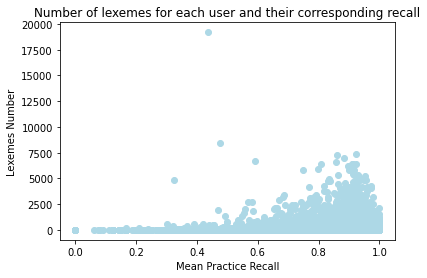

In [29]:

plt.scatter(sap['p_recall'],sap['lexeme_id'],color='lightblue')
plt.xlabel('Mean Practice Recall')
plt.title('Number of lexemes for each user and their corresponding recall')
plt.ylabel('Lexemes Number')
plt.show()